In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import snook.data.blender as blender
import snook.data.dataset as dataset
import snook.data.generator as generator
import torch

In [2]:
colors = generator.COLORS
balls  = [f"../resources/fbx/ball_{color}.fbx" for color in colors]
cue    = "../resources/fbx/cue.fbx"
pool   = "../resources/fbx/pool.fbx"
hdri   = "../resources/hdri"

scene = generator.Scene(
    generator.cFiles(balls, cue, pool, hdri),
    generator.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
    generator.cDistances(0.1, 1.5, (10.0, 20.0)),
)

os.makedirs("renders", exist_ok=True)
os.makedirs("data", exist_ok=True)
for i in tqdm(range(2), desc="Generating"):
    scene.sample()
    scene.render(f"renders/{i}.png")
    scene.register(f"data/{i}.txt")

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000199 sec)

	FBX import: Templates...
		Done (0.000056 sec)

	FBX import: Nodes...
		Done (0.000122 sec)

	FBX import: Connections...
		Done (0.000075 sec)

	FBX import: Meshes...
		Done (0.014859 sec)

	FBX import: Materials & Textures...
		Done (0.007087 sec)

	FBX import: Cameras & Lamps...
		Done (0.000076 sec)

	FBX import: Objects & Armatures...
		Done (0.000347 sec)

	FBX import: ShapeKeys...
		Done (0.000057 sec)

	FBX import: Animations...
		Done (0.000128 sec)

	FBX import: Assign materials...
		Done (0.000176 sec)

	FBX import: Assign textures...
		Done (0.005585 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000170 sec)

	Done (0.033208 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001401 sec)

	FBX import: Templates...
		Done (0.000086 sec)

	FBX import: Nodes...

		Done (0.015095 sec)

	FBX import: Materials & Textures...
		Done (0.000540 sec)

	FBX import: Cameras & Lamps...
		Done (0.000131 sec)

	FBX import: Objects & Armatures...
		Done (0.000330 sec)

	FBX import: ShapeKeys...
		Done (0.000133 sec)

	FBX import: Animations...
		Done (0.000077 sec)

	FBX import: Assign materials...
		Done (0.000087 sec)

	FBX import: Assign textures...
		Done (0.000072 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000065 sec)

	Done (0.021251 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000848 sec)

	FBX import: Templates...
		Done (0.000397 sec)

	FBX import: Nodes...
		Done (0.000105 sec)

	FBX import: Connections...
		Done (0.000101 sec)

	FBX import: Meshes...
		Done (0.014449 sec)

	FBX import: Materials & Textures...
		Done (0.000458 sec)

	FBX import: Cameras & Lamps...
		Done (0.000243 sec)

	FBX import: Objects & Armatures...
		Done (0.000330 sec

FBX version: 7400
	FBX import: Prepare...
		Done (0.000743 sec)

	FBX import: Templates...
		Done (0.000119 sec)

	FBX import: Nodes...
		Done (0.000133 sec)

	FBX import: Connections...
		Done (0.000127 sec)

	FBX import: Meshes...
		Done (10.268197 sec)

	FBX import: Materials & Textures...
		Done (0.002742 sec)

	FBX import: Cameras & Lamps...
		Done (0.000674 sec)

	FBX import: Objects & Armatures...
		Done (0.000354 sec)

	FBX import: ShapeKeys...
		Done (0.000457 sec)

	FBX import: Animations...
		Done (0.000236 sec)

	FBX import: Assign materials...
		Done (0.000847 sec)

	FBX import: Assign textures...
		Done (0.000479 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000076 sec)

	Done (10.780457 sec)

Import finished.


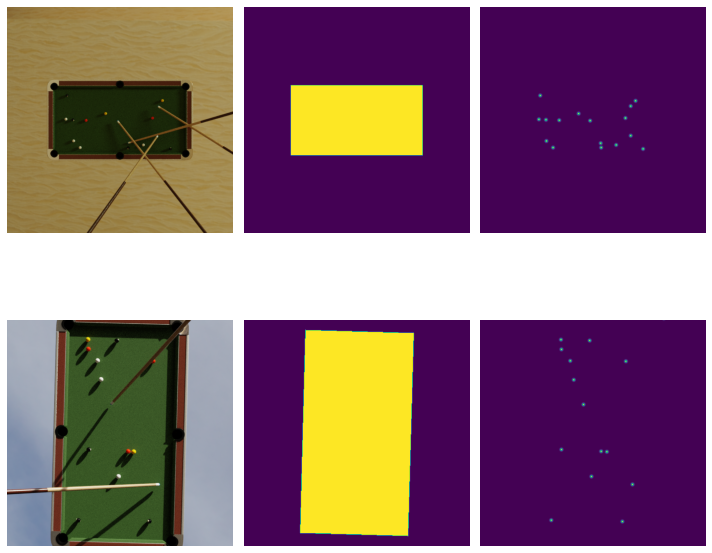

In [3]:
test_set = dataset.ReMaHeDataset("renders", "data", spread=4.0)

plt.figure(figsize=(10, 10))

with torch.no_grad():
    for i, (render, mask, heatmap) in enumerate(test_set):
        render = render.permute((1, 2, 0))
        
        plt.subplot(len(test_set), 3, 3 * i + 1)
        plt.imshow(render)
        plt.axis("off")
        
        plt.subplot(len(test_set), 3, 3 * i + 2)
        plt.imshow(mask)
        plt.axis("off")
        
        plt.subplot(len(test_set), 3, 3 * i + 3)
        plt.imshow(heatmap)
        plt.axis("off")
        
plt.tight_layout()
plt.show()

In [4]:
shutil.rmtree("renders")
shutil.rmtree("data")